In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

73.56419996656541 -1.0828625000944498
57.38362031027199 28.413357160561702
89.19258274878888 163.6771327984364
36.27565264842276 120.42286377737747
-15.369782727197077 -176.06134107065625
48.1822673054522 -112.4302067102403
10.355850976478536 66.20595358682982
16.952631804406693 -50.99711268331845
-57.060739415213405 -122.48008582779094
41.0135432900033 -49.20896871264833
45.14330522629251 94.4731654452674
81.19053595036675 -133.31842020033926
67.18050759058303 -93.85461779271805
31.759494441343833 70.71332999813845
-4.8581336815956035 2.4684600436093547
36.70542621290598 -167.41356663632502
-81.02180052915257 -75.34977845476388
30.917133022667684 -3.857007755346899
-54.93862797692224 -97.41253591006485
-23.826938684016724 109.98031911539448
-75.46315552614502 -87.96613000686881
84.99857793157739 8.657312571507845
74.22881818714063 95.12840431397206
-63.32518511213121 67.65075155927579
19.539658250687822 16.407234952263906
36.48071175896986 44.18769628470949
56.09566597480742 84.983906

61.99476326487675 22.872979165996696
-10.136509370112805 121.22324623775319
0.5416320900685889 -94.57001415456809
86.5338088087073 130.05276687385492
53.13431869692914 -147.15561850887084
-36.79709246546538 -156.48677245083408
-47.02207669543044 -127.2733747048245
-9.587875736667826 135.82191634296998
61.99429184585273 152.73702379938663
3.908869956562185 73.43451351856146
-20.364500560322682 177.46617571711357
-76.09805576269878 -159.2308874878122
-32.46953523125496 8.384632297054964
75.74533389872434 120.11830147108009
75.18000914867017 42.33288744795274
45.563098535514456 115.3060697540464
20.040271843358994 -134.95844085874995
-74.93314250196096 -23.306059618885797
-86.32506290348914 -170.30413435485065
26.021946775744468 -177.71448778639964
23.143172550690593 -38.064261540158526
49.91700147624971 155.15006080509772
87.34928864573294 -73.04946068777731
6.574033466075278 31.911173367553744
17.28766370593094 50.345591383972305
1.5597425547490502 -17.969330938941056
22.49854500577915 

-86.36445439569565 -83.72282499452466
-88.88945185887385 114.46424453070335
-27.179884375532666 -167.3347046541567
-55.26472825319662 127.66982965813895
-8.868471353180965 26.306285354387
-71.91271224980864 -117.27800487809083
80.80561539890002 -130.02328978994075
60.88088152308438 -92.4740123430819
-7.323361051341038 2.554645555036501
-6.920853552603049 -35.12357278537766
44.96459486735097 6.306384479807605
70.47929248280789 64.58147698692846
-83.99421771801975 122.286576375898
-7.365995089352026 -83.82497231254342
-82.39307092258875 60.823116266871466
38.82219278412825 55.32687835846909
-40.63410070732274 45.79781696991802
-23.790030712926878 145.62565965735604
-46.20525171900108 175.06863463014167
31.163152834629244 -109.78606999664872
51.89072791765312 30.682586402633405
-52.19927706809137 69.51147861783906
-1.329678273511675 -168.23073276410986
-29.942985533396282 75.70918783186065
75.46040424127636 71.0589886367352
21.36014291845605 -144.8891920857298
-44.29928978808717 -147.7053

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


614

In [8]:
import requests# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | ostrov
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | jimo
Processing Record 5 of Set 1 | halalo
City not found. Skipping...
Processing Record 6 of Set 1 | raymond
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | bathsheba
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | torbay
Processing Record 11 of Set 1 | hami
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | dera ismail khan
Processing Record 15 of Set 1 | omboue
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | mrirt
City not found. Skipping...
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
Processi

Processing Record 39 of Set 4 | chiredzi
Processing Record 40 of Set 4 | porto nacional
Processing Record 41 of Set 4 | haines junction
Processing Record 42 of Set 4 | sandy point
Processing Record 43 of Set 4 | boguchany
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | palauig
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | hilo
Processing Record 48 of Set 4 | mount gambier
Processing Record 49 of Set 4 | tomohon
Processing Record 50 of Set 4 | hobart
Processing Record 1 of Set 5 | pueblo
Processing Record 2 of Set 5 | san quintin
Processing Record 3 of Set 5 | victor harbor
Processing Record 4 of Set 5 | hasaki
Processing Record 5 of Set 5 | ongole
Processing Record 6 of Set 5 | vardo
Processing Record 7 of Set 5 | yerbogachen
Processing Record 8 of Set 5 | muncar
Processing Record 9 of Set 5 | port hardy
Processing Record 10 of Set 5 | pokhara
Processing Record 11 of Set 5 | high level
Processing Record 12 of Set 5 | tongchuan
Processin

Processing Record 29 of Set 8 | male
Processing Record 30 of Set 8 | baruun-urt
Processing Record 31 of Set 8 | yirol
City not found. Skipping...
Processing Record 32 of Set 8 | bonthe
Processing Record 33 of Set 8 | gat
Processing Record 34 of Set 8 | zhigansk
Processing Record 35 of Set 8 | belmonte
Processing Record 36 of Set 8 | ancud
Processing Record 37 of Set 8 | samarai
Processing Record 38 of Set 8 | matamoros
Processing Record 39 of Set 8 | codrington
Processing Record 40 of Set 8 | jibuti
Processing Record 41 of Set 8 | antoniny
Processing Record 42 of Set 8 | farafangana
Processing Record 43 of Set 8 | kitsuki
Processing Record 44 of Set 8 | arcata
Processing Record 45 of Set 8 | kutum
Processing Record 46 of Set 8 | necochea
Processing Record 47 of Set 8 | derbent
Processing Record 48 of Set 8 | sola
Processing Record 49 of Set 8 | namatanai
Processing Record 50 of Set 8 | zhezkazgan
Processing Record 1 of Set 9 | muravlenko
Processing Record 2 of Set 9 | tuatapere
Process

Processing Record 17 of Set 12 | san carlos
Processing Record 18 of Set 12 | rapid valley
Processing Record 19 of Set 12 | kyaikkami
Processing Record 20 of Set 12 | pustomyty
Processing Record 21 of Set 12 | bongandanga
Processing Record 22 of Set 12 | auki
Processing Record 23 of Set 12 | siavonga
Processing Record 24 of Set 12 | penzance
Processing Record 25 of Set 12 | medford
Processing Record 26 of Set 12 | ailigandi
Processing Record 27 of Set 12 | rio gallegos
Processing Record 28 of Set 12 | jujuy
City not found. Skipping...
Processing Record 29 of Set 12 | kidal
Processing Record 30 of Set 12 | nailsea
Processing Record 31 of Set 12 | salur
Processing Record 32 of Set 12 | lasem
Processing Record 33 of Set 12 | formiga
Processing Record 34 of Set 12 | lancaster
Processing Record 35 of Set 12 | port blair
Processing Record 36 of Set 12 | hambantota
Processing Record 37 of Set 12 | dawei
Processing Record 38 of Set 12 | severo-yeniseyskiy
Processing Record 39 of Set 12 | qasigi

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvik,62.2266,-6.5890,54.52,79,97,13.82,FO,2022-08-29 15:13:47
1,Ostrov,57.3439,28.3537,80.33,56,94,5.01,RU,2022-08-29 15:13:47
2,Cherskiy,68.7500,161.3000,44.71,89,7,7.92,RU,2022-08-29 15:13:48
3,Jimo,36.3897,120.4622,65.32,95,100,3.13,CN,2022-08-29 15:13:48
4,Raymond,43.9015,-70.4703,82.80,76,89,5.93,US,2022-08-29 15:13:48
5,Kavaratti,10.5669,72.6420,80.98,81,100,19.69,IN,2022-08-29 15:13:49
6,Bathsheba,13.2167,-59.5167,90.21,66,40,17.27,BB,2022-08-29 15:13:49
7,Rikitea,-23.1203,-134.9692,72.01,82,84,14.63,PF,2022-08-29 15:13:49
8,Torbay,47.6666,-52.7314,72.88,68,79,14.07,CA,2022-08-29 15:13:50
9,Hami,42.8000,93.4500,77.95,16,1,3.36,CN,2022-08-29 15:13:12


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Get today's date in seconds.
today = time.strftime("%x")
today


'08/29/22'

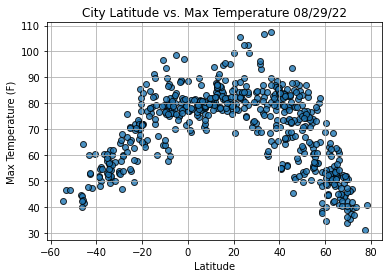

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

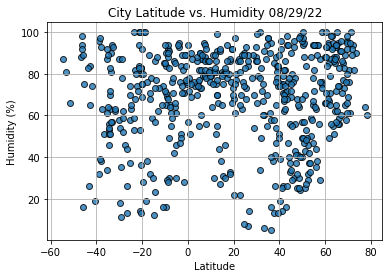

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

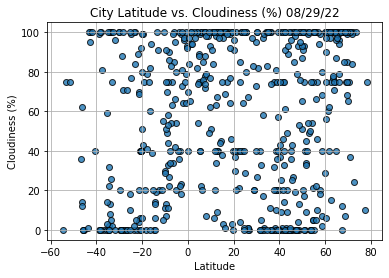

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

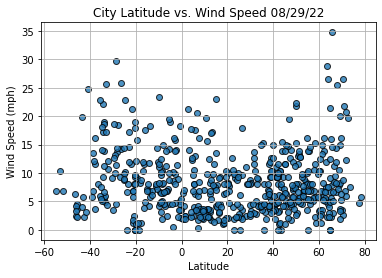

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()